In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('2023-10-01-2024-01-29-Middle_East-Israel-Palestine.csv')
data.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,ISR38822,19 January 2024,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,NaN,3,...,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,NaN,1705978255
1,ISR38830,19 January 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,...,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255
2,ISR38864,19 January 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Students (Israel),6,...,Petah Tikva,32.0871,34.8875,1,Haaretz,National,"On 19 January 2024, dozens of high school stud...",0,crowd size=dozens,1705978256
3,ISR38867,19 January 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Women (Israel),6,...,Tel Aviv,32.0809,34.7806,1,Haaretz,National,"On 19 January 2024, dozens of women and relati...",0,crowd size=dozens,1705978256
4,ISR38868,19 January 2024,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Israel (2022-),NaN,1,...,Haifa,32.8184,34.9885,2,Calcalist; Colbo News; Haaretz; Jerusalem Post...,Subnational-National,"Interception: On 19 January 2024, Israeli mili...",0,NaN,1705978256


In [2]:
data.shape

(18090, 28)

In [3]:
data.isna().sum()

event_id_cnty             0
event_date                0
year                      0
time_precision            0
disorder_type             0
event_type                0
sub_event_type            0
actor1                    0
assoc_actor_1         15575
inter1                    0
interaction               0
civilian_targeting    11632
iso                       0
region                    0
country                   0
admin1                    0
admin2                   10
admin3                15235
location                  0
latitude                  0
longitude                 0
geo_precision             0
source                    0
source_scale              0
notes                     0
fatalities                0
tags                  13894
timestamp                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18090 entries, 0 to 18089
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       18090 non-null  object 
 1   event_date          18090 non-null  object 
 2   year                18090 non-null  int64  
 3   time_precision      18090 non-null  int64  
 4   disorder_type       18090 non-null  object 
 5   event_type          18090 non-null  object 
 6   sub_event_type      18090 non-null  object 
 7   actor1              18090 non-null  object 
 8   assoc_actor_1       2515 non-null   object 
 9   inter1              18090 non-null  int64  
 10  interaction         18090 non-null  int64  
 11  civilian_targeting  6458 non-null   object 
 12  iso                 18090 non-null  int64  
 13  region              18090 non-null  object 
 14  country             18090 non-null  object 
 15  admin1              18090 non-null  object 
 16  admi

In [9]:
data['event_date'] = pd.to_datetime(data['event_date'])

In [11]:
data['month'] = data['event_date'].dt.strftime('%m')

### Which month has highest events?

In [13]:
data.month.value_counts()

10    6040
11    4874
12    4655
01    2521
Name: month, dtype: int64

<AxesSubplot:>

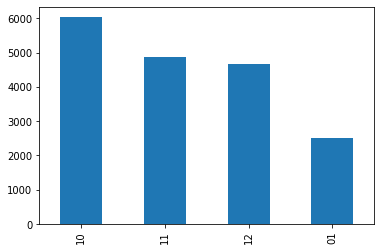

In [14]:
data.month.value_counts().plot(kind = 'bar')

In [17]:
data.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting', 'iso',
       'region', 'country', 'admin1', 'admin2', 'admin3', 'location',
       'latitude', 'longitude', 'geo_precision', 'source', 'source_scale',
       'notes', 'fatalities', 'tags', 'timestamp', 'month'],
      dtype='object')

In [22]:
data.source_scale.unique()

array(['National', 'Subnational-National', 'New media-National',
       'National-International', 'International', 'Other',
       'Other-New media', 'Regional', 'Other-National',
       'Local partner-New media', 'National-Regional', 'Subnational',
       'Other-Regional', 'Other-International', 'Regional-International',
       'New media-Regional', 'New media-International', 'New media'],
      dtype=object)

### Which source has more number of events?

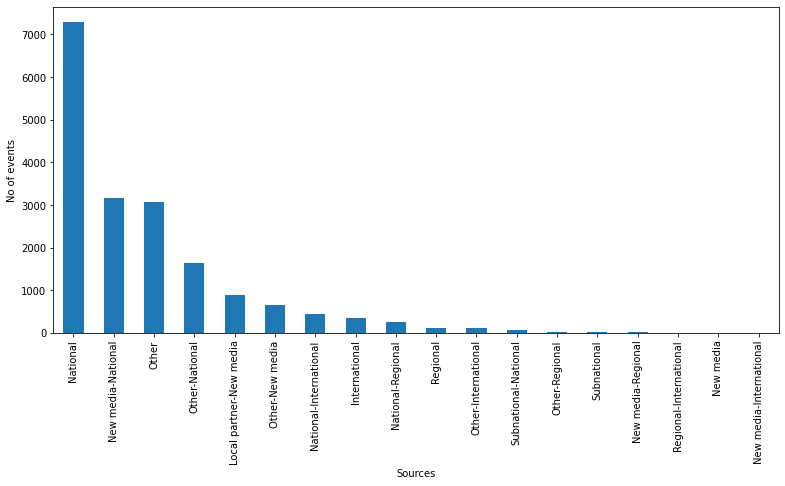

In [26]:
plt.figure(figsize = (13, 6))
data.source_scale.value_counts().plot(kind = 'bar')
plt.xlabel('Sources')
plt.ylabel('No of events')
plt.show()

### Which event has occured more? 

In [28]:
data.event_type.value_counts()

Explosions/Remote violence    7325
Riots                         3672
Battles                       2920
Strategic developments        2501
Violence against civilians    1150
Protests                       522
Name: event_type, dtype: int64

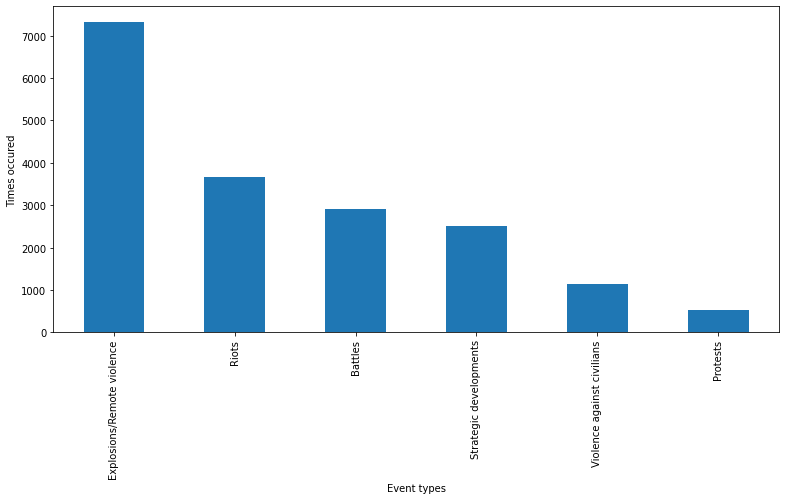

In [30]:
plt.figure(figsize = (13, 6))
data.event_type.value_counts().plot(kind = 'bar')
plt.xlabel('Event types')
plt.ylabel('Times occured')
plt.show()

### Which event and sub event has more occurance?

In [40]:
pd.DataFrame(data.groupby(['event_type', 'sub_event_type'])['event_date'].count())

event_date
event_type                 sub_event_type                                 
Battles                    Armed clash                                2908
                           Government regains territory                  6
                           Non-state actor overtakes territory           6
Explosions/Remote violence Air/drone strike                           4115
                           Grenade                                     115
                           Remote explosive/landmine/IED               138
                           Shelling/artillery/missile attack          2957
Protests                   Excessive force against protesters           20
                           Peaceful protest                            446
                           Protest with intervention                    56
Riots                      Mob violence                               3122
                           Violent demonstration                       550
Strategic developments     Agreement                                     2
                           Arrests                                     108
                           Change to group/activity                     72
                           Disrupted weapons use                      1365
                           Looting/property destruction                760
                           Other                                       194
Violence against civilians Abduction/forced disappearance                4
                           Attack                                     1146

### Types of Disorders

In [42]:
data.disorder_type.unique()

array(['Political violence', 'Demonstrations', 'Strategic developments',
       'Political violence; Demonstrations'], dtype=object)

### Which disorder occured more?

In [43]:
data.disorder_type.value_counts()

Political violence                    14517
Strategic developments                 2501
Demonstrations                         1052
Political violence; Demonstrations       20
Name: disorder_type, dtype: int64

Text(0, 0.5, 'Occurances')

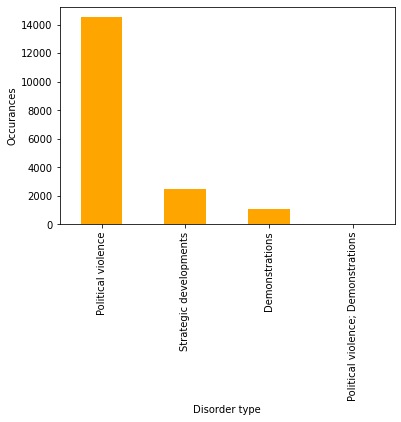

In [45]:
data.disorder_type.value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('Disorder type')
plt.ylabel('Occurances')

### Which year has more events?

<AxesSubplot:>

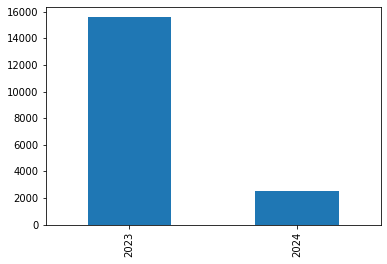

In [48]:
data.year.value_counts().plot(kind = 'bar')

### Which geomark effected by more number of events?

In [52]:
pd.DataFrame(data.groupby(['latitude','longitude'])['event_id_cnty'].count().sort_values(ascending = False)[:1])

,,event_id_cnty
latitude,longitude,
31.287,34.2595,450


### Which event results more deaths?

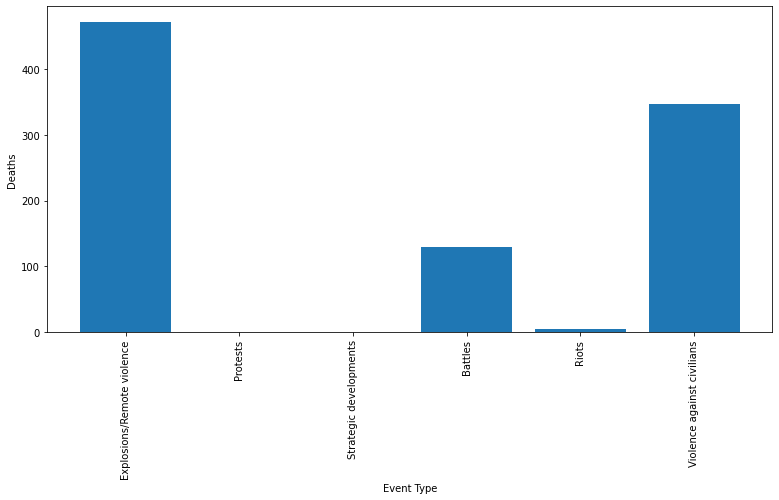

In [56]:
plt.figure(figsize = (13, 6))
plt.bar(data.event_type, data.fatalities)
plt.xticks(rotation = 90)
plt.xlabel('Event Type')
plt.ylabel('Deaths')
plt.show()

### Which month has more deaths?

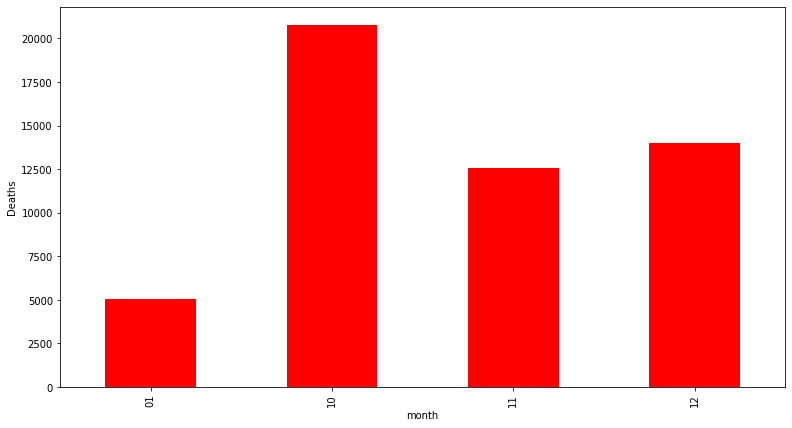

In [69]:
plt.figure(figsize = (13,7))
data.groupby('month')['fatalities'].sum().plot(kind = 'bar', color = 'red')
plt.ylabel('Deaths')
plt.show()

### Which locations has more death?

In [76]:
data.groupby('location')['fatalities'].sum().sort_values(ascending = False)

location
Mukhayyam Jabalya    3716
Gaza - Az Zaytun     3688
Rafah                3088
Jabalya              3088
An Nusayrat          2960
                     ... 
Hinnanit                0
Herzliya                0
Hemed                   0
Hatzerim                0
Zububah                 0
Name: fatalities, Length: 732, dtype: int64

### Top 5 locations which are effected with more number of deaths?

In [78]:
pd.DataFrame(data.groupby('location')['fatalities'].sum().sort_values(ascending = False)[:5])

,fatalities
location,
Mukhayyam Jabalya,3716
Gaza - Az Zaytun,3688
Rafah,3088
Jabalya,3088
An Nusayrat,2960


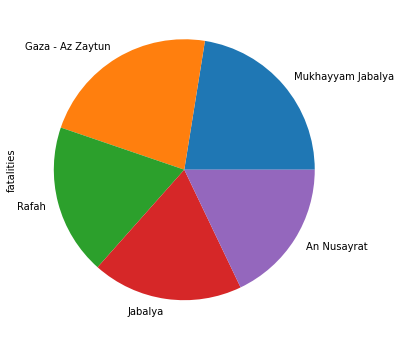

In [98]:
plt.figure(figsize = (10,6))
data.groupby('location')['fatalities'].sum().sort_values(ascending = False)[:5].plot(kind = 'pie')
plt.show()

### Which country is effected by more no of events?

In [89]:
data.country.value_counts()

Palestine    15227
Israel        2863
Name: country, dtype: int64

### Which Country has more deaths?

In [91]:
data.groupby('country')['fatalities'].sum()

country
Israel        2824
Palestine    49587
Name: fatalities, dtype: int64

<AxesSubplot:xlabel='country'>

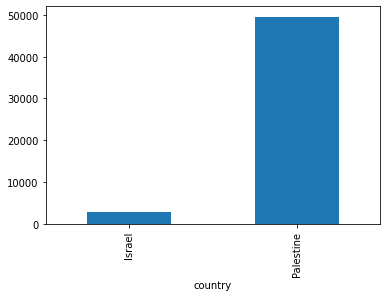

In [92]:
data.groupby('country')['fatalities'].sum().plot(kind = 'bar')

In [94]:
data.admin1.unique()

array(['HaZafon', 'Haifa', 'HaMerkaz', 'Tel Aviv', 'HaDarom', 'Jerusalem',
       'Gaza Strip', 'West Bank'], dtype=object)

### Country wise deaths per month

In [105]:
 pd.DataFrame(data.groupby(['country', 'month'])['fatalities'].sum())

fatalities
country   month            
Israel    01              6
          10           2786
          11             24
          12              8
Palestine 01           5070
          10          18002
          11          12539
          12          13976